In [1]:
# Adding src/ folder to import path
import sys
sys.path.append("../src")

In [40]:
import os.path
import pandas as pd
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import seaborn as sb
import swifter

from birdclef.load_data import *

DATA_PATH = "/workspace/Data/birdclef-2021"
SAMPLE_RATE = 32000
NORM_ENERGY = 100
N_MEL = 200

In [3]:
%%sh 
ls /workspace/Data/birdclef-2021

README.md
sample_submission.csv
test.csv
test_soundscapes
train_metadata.csv
train_short_audio
train_soundscape_labels.csv
train_soundscapes


In [4]:
metadata_df = load_metadata(DATA_PATH)
labels_df = load_labels(DATA_PATH)

In [29]:
metadata_df

,primary_label,latitude,longitude,date,time,rating,filename,common_name,scientific_name,year,month,day
0,acafly,35.3860,-84.1250,2012-08-12,09:30,2.5,XC109605.ogg,Acadian Flycatcher,Empidonax virescens,2012,08,12
1,acafly,9.1334,-79.6501,2000-12-26,?,3.0,XC11209.ogg,Acadian Flycatcher,Empidonax virescens,2000,12,26
2,acafly,5.7813,-75.7452,2012-01-10,15:20,3.0,XC127032.ogg,Acadian Flycatcher,Empidonax virescens,2012,01,10
3,acafly,4.6717,-75.6283,2009-06-19,07:50,3.5,XC129974.ogg,Acadian Flycatcher,Empidonax virescens,2009,06,19
4,acafly,4.6717,-75.6283,2009-06-19,07:50,3.5,XC129981.ogg,Acadian Flycatcher,Empidonax virescens,2009,06,19
...,...,...,...,...,...,...,...,...,...,...,...,...
62869,yetvir,30.2150,-97.6505,2020-07-10,08:30,1.0,XC591680.ogg,Yellow-throated Vireo,Vireo flavifrons,2020,07,10
62870,yetvir,42.3005,-72.5877,2019-05-31,09:30,5.0,XC600085.ogg,Yellow-throated Vireo,Vireo flavifrons,2019,05,31
62871,yetvir,42.3005,-72.5877,2020-06-02,08:30,4.5,XC602701.ogg,Yellow-throated Vireo,Vireo flavifrons,2020,06,02
62872,yetvir,32.2357,-99.8811,2019-04-27,17:30,4.0,XC614733.ogg,Yellow-throated Vireo,Vireo flavifrons,2019,04,27


In [6]:
labels_df

,row_id,site,audio_id,seconds,birds
0,7019_COR_5,COR,7019,5,nocall
1,7019_COR_10,COR,7019,10,nocall
2,7019_COR_15,COR,7019,15,nocall
3,7019_COR_20,COR,7019,20,nocall
4,7019_COR_25,COR,7019,25,nocall
...,...,...,...,...,...
2395,54955_SSW_580,SSW,54955,580,nocall
2396,54955_SSW_585,SSW,54955,585,grycat
2397,54955_SSW_590,SSW,54955,590,grycat
2398,54955_SSW_595,SSW,54955,595,nocall


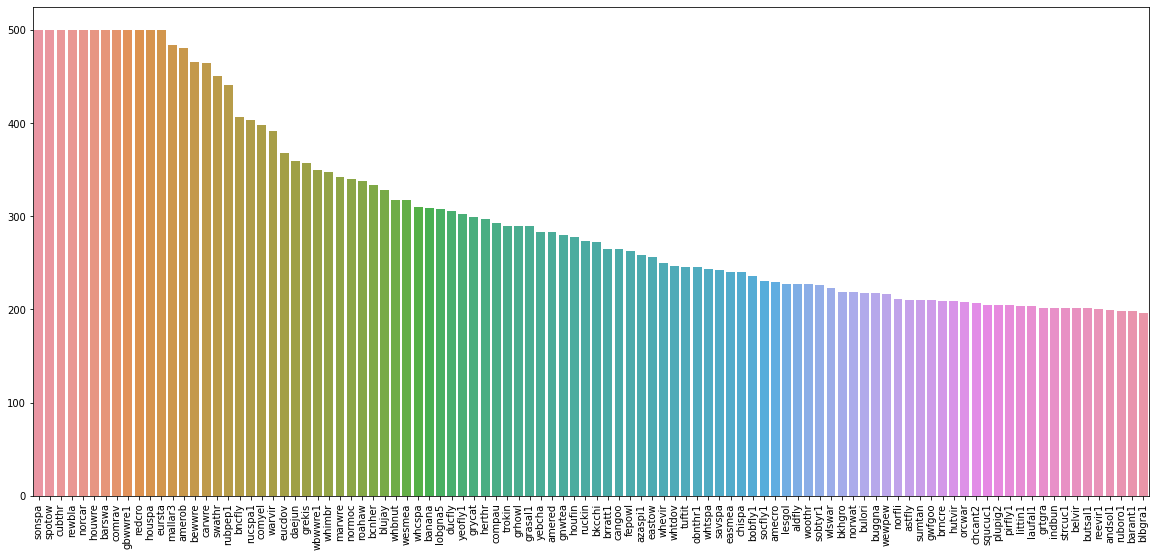

In [24]:
bird_counts = metadata_df["primary_label"].value_counts()[:100]
_, ax = plt.subplots(figsize=(20, 9))
sb.barplot(x=bird_counts.index, y=bird_counts.values, ax=ax)
_ = plt.xticks(rotation=90)

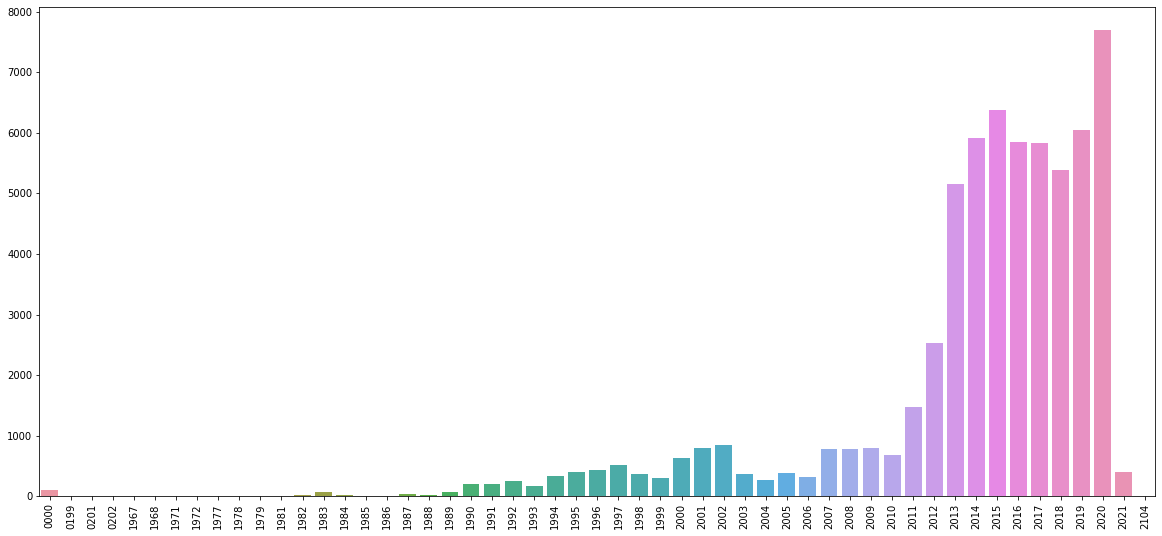

In [36]:
bird_counts = metadata_df["year"].value_counts().sort_index()
_, ax = plt.subplots(figsize=(20, 9))
sb.barplot(x=bird_counts.index, y=bird_counts.values, ax=ax)
_ = plt.xticks(rotation=90)

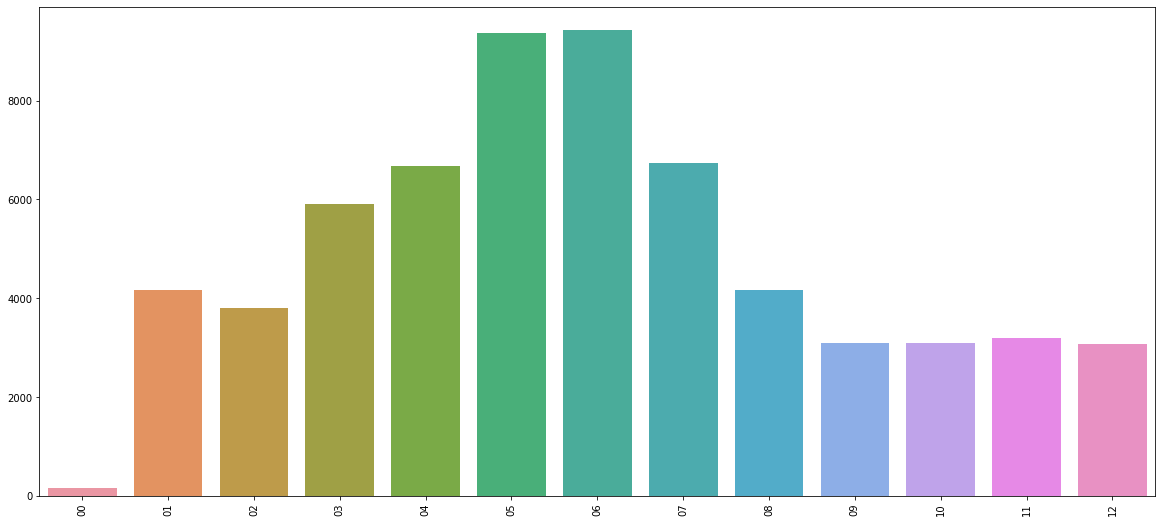

In [37]:
bird_counts = metadata_df["month"].value_counts().sort_index()
_, ax = plt.subplots(figsize=(20, 9))
sb.barplot(x=bird_counts.index, y=bird_counts.values, ax=ax)
_ = plt.xticks(rotation=90)

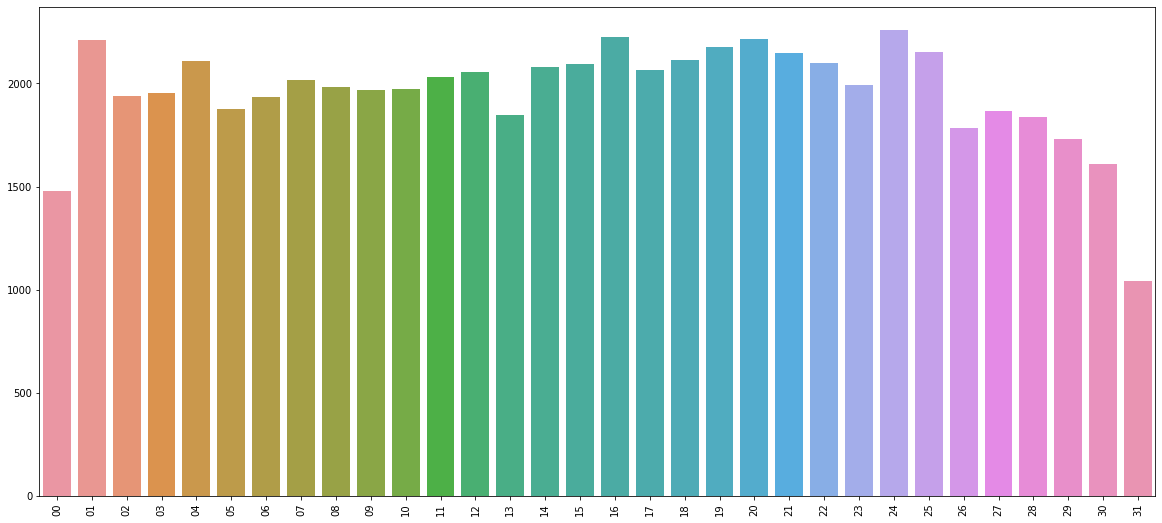

In [38]:
bird_counts = metadata_df["day"].value_counts().sort_index()
_, ax = plt.subplots(figsize=(20, 9))
sb.barplot(x=bird_counts.index, y=bird_counts.values, ax=ax)
_ = plt.xticks(rotation=90)

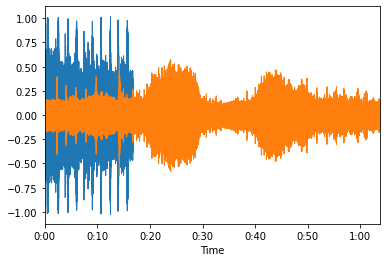

In [25]:
signal_1 = load_short_audio('acafly', 'XC109605.ogg', DATA_PATH + '/train_short_audio', SAMPLE_RATE)
signal_2 = load_short_audio('acafly', 'XC11209.ogg', DATA_PATH + '/train_short_audio', SAMPLE_RATE)

librosa.display.waveplot(signal_2, sr=SAMPLE_RATE)
librosa.display.waveplot(signal_1, sr=SAMPLE_RATE)

In [60]:
def get_audio_duration(row):
    """
        Get audio duration.
    """
    y = load_short_audio(row["primary_label"], row["filename"], DATA_PATH + '/train_short_audio', SAMPLE_RATE)
    if y is not None:
        return librosa.get_duration(y=y, sr=SAMPLE_RATE)
    return 0

metadata_df["audio_duration"] = metadata_df[["primary_label", "filename"]].swifter.apply(get_audio_duration, axis=1)
metadata_df

Pandas Apply:   0%|          | 0/62874 [00:00<?, ?it/s]

,primary_label,latitude,longitude,date,time,rating,filename,common_name,scientific_name,year,month,day,audio_duration
0,acafly,35.3860,-84.1250,2012-08-12,09:30,2.5,XC109605.ogg,Acadian Flycatcher,Empidonax virescens,2012,08,12,63.674563
1,acafly,9.1334,-79.6501,2000-12-26,?,3.0,XC11209.ogg,Acadian Flycatcher,Empidonax virescens,2000,12,26,16.654156
2,acafly,5.7813,-75.7452,2012-01-10,15:20,3.0,XC127032.ogg,Acadian Flycatcher,Empidonax virescens,2012,01,10,47.139063
3,acafly,4.6717,-75.6283,2009-06-19,07:50,3.5,XC129974.ogg,Acadian Flycatcher,Empidonax virescens,2009,06,19,14.068031
4,acafly,4.6717,-75.6283,2009-06-19,07:50,3.5,XC129981.ogg,Acadian Flycatcher,Empidonax virescens,2009,06,19,40.660688
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62869,yetvir,30.2150,-97.6505,2020-07-10,08:30,1.0,XC591680.ogg,Yellow-throated Vireo,Vireo flavifrons,2020,07,10,44.509000
62870,yetvir,42.3005,-72.5877,2019-05-31,09:30,5.0,XC600085.ogg,Yellow-throated Vireo,Vireo flavifrons,2019,05,31,78.445000
62871,yetvir,42.3005,-72.5877,2020-06-02,08:30,4.5,XC602701.ogg,Yellow-throated Vireo,Vireo flavifrons,2020,06,02,101.869000
62872,yetvir,32.2357,-99.8811,2019-04-27,17:30,4.0,XC614733.ogg,Yellow-throated Vireo,Vireo flavifrons,2019,04,27,16.419062


In [63]:
metadata_df.to_csv(DATA_PATH + "/outputs/train_metadata.csv")

<AxesSubplot:xlabel='audio_duration', ylabel='Count'>

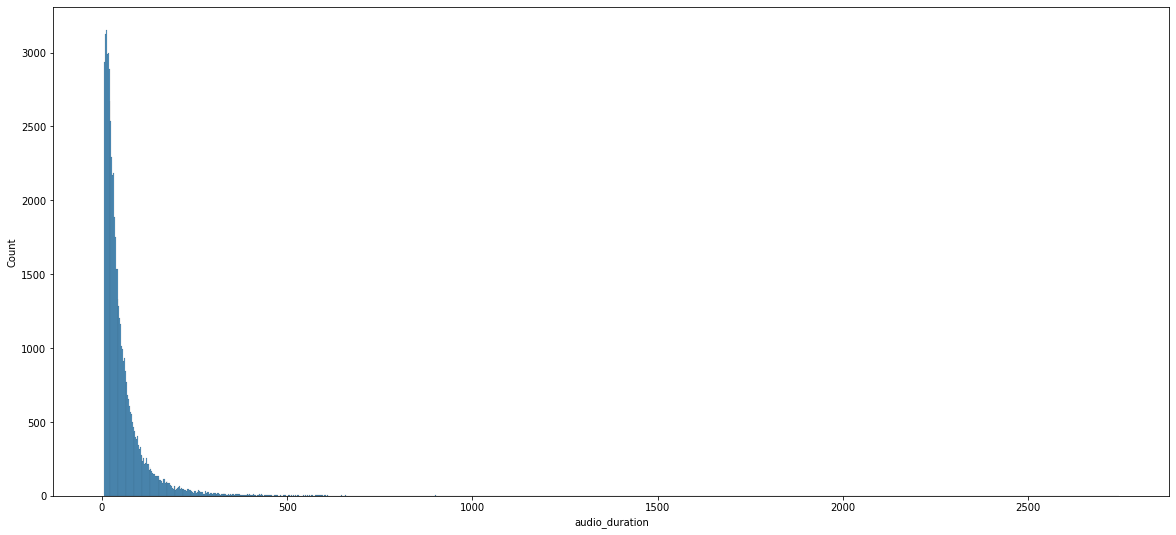

In [61]:
_, ax = plt.subplots(figsize=(20, 9))
sb.histplot(data=metadata_df["audio_duration"], ax=ax)

In [65]:
metadata_df["audio_duration"].describe()

count    62874.000000
mean        56.255305
std         74.042363
min          5.958125
25%         18.378250
50%         34.260688
75%         66.205000
max       2745.352937
Name: audio_duration, dtype: float64

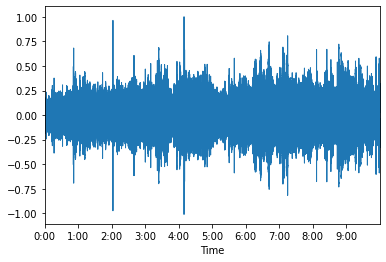

In [26]:
for x in load_soundscape_audio('7019_COR', DATA_PATH + '/train_soundscapes', SAMPLE_RATE):
    librosa.display.waveplot(x[1], sr=SAMPLE_RATE)

(128, 3980)


/opt/conda/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/opt/conda/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


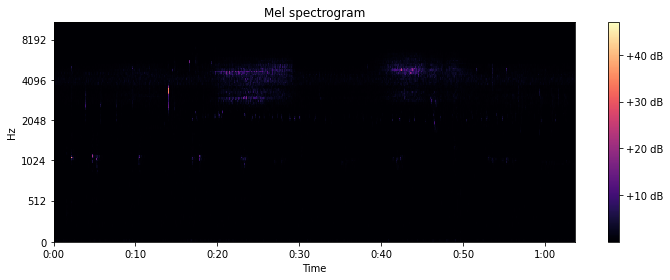

In [27]:
from birdclef.postprocessing import get_mel_spec

plt.figure(figsize=(10, 4))
mel_spec = get_mel_spec(signal_1)
print(mel_spec.shape)
librosa.display.specshow(mel_spec, sr=SAMPLE_RATE, y_axis='mel', fmax=None, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

(128, 1041)


/opt/conda/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/opt/conda/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


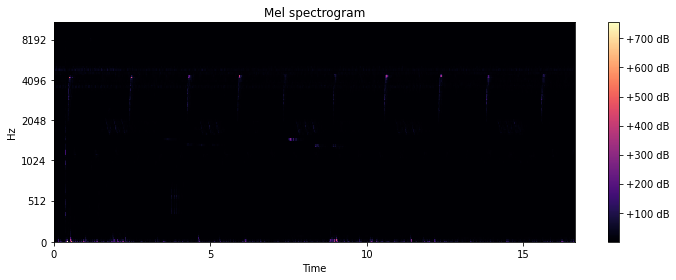

In [30]:
plt.figure(figsize=(10, 4))
mel_spec = get_mel_spec(signal_2)
print(mel_spec.shape)
librosa.display.specshow(mel_spec, sr=SAMPLE_RATE, y_axis='mel', fmax=None, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()